> ## Import the libraries and read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
pd.pandas.set_option('display.max_columns',None)

> ## Print the values

In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> ## Exploratory Data Analysis

In [3]:
data.shape

(1460, 81)

In [4]:
[(col,data[col].isnull().sum()) for col in data.columns if data[col].isnull().sum()>1]

[('LotFrontage', 259),
 ('Alley', 1369),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinType2', 38),
 ('FireplaceQu', 690),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('PoolQC', 1453),
 ('Fence', 1179),
 ('MiscFeature', 1406)]

### A few columns has a lot of null values. Null values > 600. So we drop these column. We also drop the Id column.

In [5]:
data = data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [6]:
[(col,data[col].dtypes) for col in data.columns if data[col].isnull().sum()>1]

[('LotFrontage', dtype('float64')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinType2', dtype('O')),
 ('FireplaceQu', dtype('O')),
 ('GarageType', dtype('O')),
 ('GarageYrBlt', dtype('float64')),
 ('GarageFinish', dtype('O')),
 ('GarageQual', dtype('O')),
 ('GarageCond', dtype('O'))]

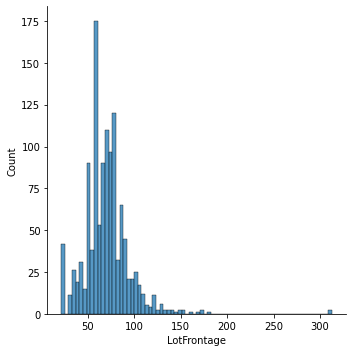

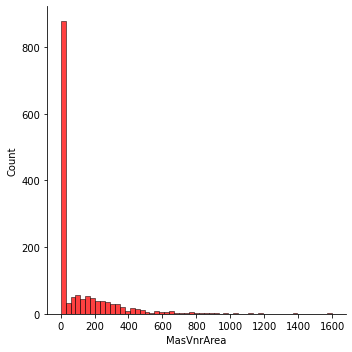

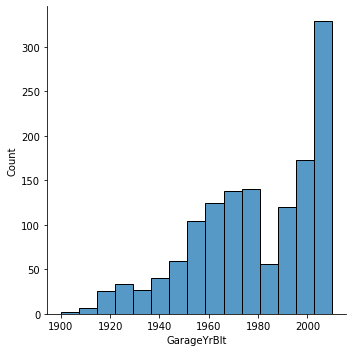

In [7]:
sns.displot(data['LotFrontage'])
plt.show()
sns.displot(data['MasVnrArea'],color='r')
plt.show()
sns.displot(data['GarageYrBlt'])
plt.show()

In [8]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

<AxesSubplot:>

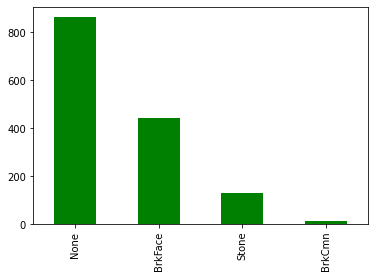

In [9]:
data['MasVnrType'].value_counts().plot(kind='bar',color='green')

In [10]:
data['MasVnrType'].fillna(data['MasVnrType'].value_counts().index[0],inplace=True)

In [11]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
data['BsmtQual'].fillna(data['BsmtQual'].value_counts().index[0],inplace=True)

In [13]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [14]:
data['BsmtCond'].fillna(data['BsmtCond'].value_counts().index[0],inplace=True)

In [15]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [16]:
data['BsmtFinType1'].fillna(data['BsmtFinType1'].value_counts().index[0],inplace=True)

In [17]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [18]:
data['BsmtFinType2'].fillna(data['BsmtFinType2'].value_counts().index[0],inplace=True)

In [19]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [20]:
data['Electrical'].fillna(data['Electrical'].value_counts().index[0],inplace=True)

In [21]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [22]:
data['GarageType'].fillna(data['GarageType'].value_counts().index[0],inplace=True)

In [23]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [24]:
data['GarageFinish'].fillna(data['GarageFinish'].value_counts().index[0],inplace=True)

In [25]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [26]:
data['GarageQual'].fillna(data['GarageQual'].value_counts().index[0],inplace=True)

In [27]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [28]:
data['GarageCond'].fillna(data['GarageCond'].value_counts().index[0],inplace=True)

In [29]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [30]:
data.drop(['FireplaceQu'],axis=1,inplace=True)

In [31]:
data.columns[data.isnull().any()]

Index(['BsmtExposure'], dtype='object')

In [32]:
data['BsmtExposure'].dtypes

dtype('O')

In [33]:
data['BsmtExposure'].fillna(data['BsmtExposure'].value_counts().index[0],inplace=True)

In [34]:
data.columns[data.isnull().any()]

Index([], dtype='object')

### All null values have been filled

In [35]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [36]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Temporal Variables
Variables having datetime like Year Built (which contains the year)
- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold

In [37]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Is there a relationship between YrSold and SalePrice

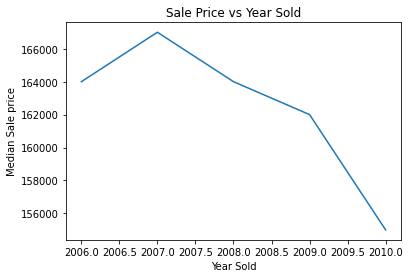

In [38]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sale price')
plt.title('Sale Price vs Year Sold')
plt.show()

### We see that Sale Price decreases with Yrsold. Instaed of the actual year, we change it wrt YrSold and find its age and relationship with SalePrice

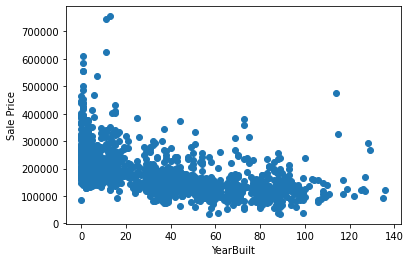

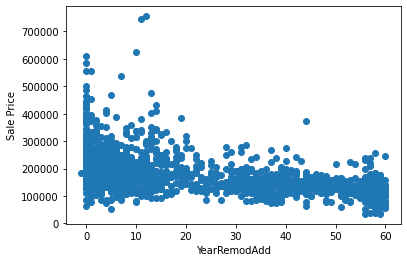

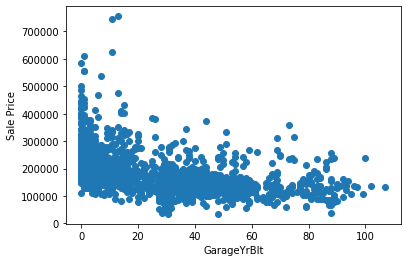

In [39]:
for feature in temporal_features:
    if feature!='YrSold':
        df=data.copy()
        df[feature]=df['YrSold']-df[feature]
        
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

### Plot 1- Year Built vs Sale Price
If the house is just built (age -0 or 1) the price is high.\
If the house is 120 or 140 years old (very old) then the price is mostly low.

### Plot 2- Year Remodification vs Sale Price
If the house has been remodified recently the pice is higher.\
Else it is lower.

### Plot 3- Garage Year Built vs Sale Price
Reecntly Built Garage areas in House have higher sale prices compared to ones build over 80-100 years back.

In [40]:
#temporal varibles
#converting to number of years

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature]=data['YrSold']-data[feature]
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Outliers

In [41]:
data.shape

(1460, 75)

In [42]:
numerical_features = list(data.select_dtypes(exclude='object').columns)

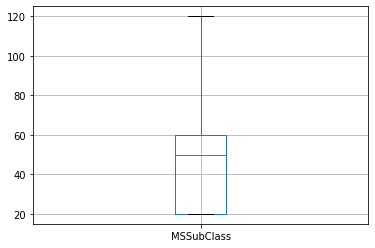

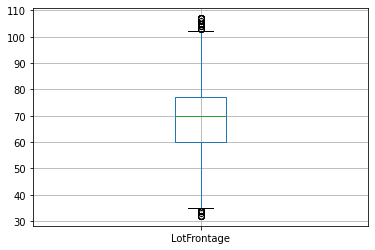

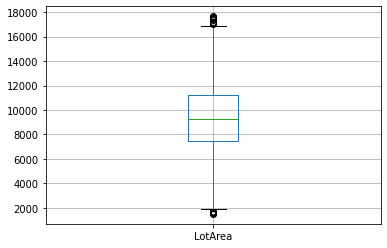

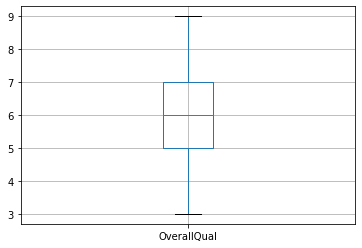

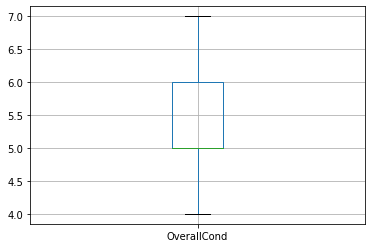

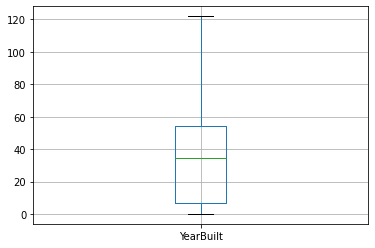

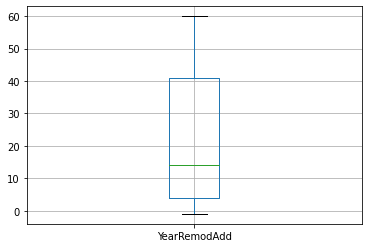

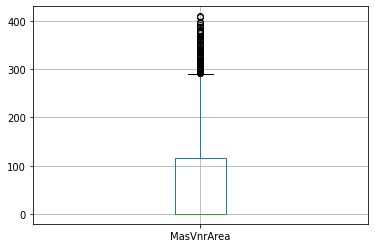

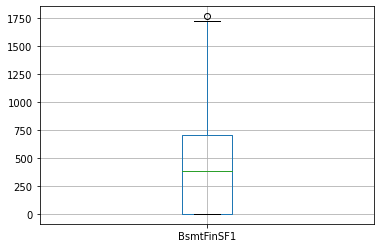

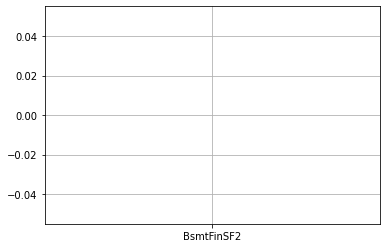

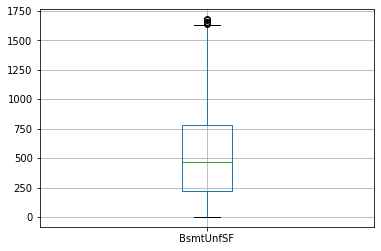

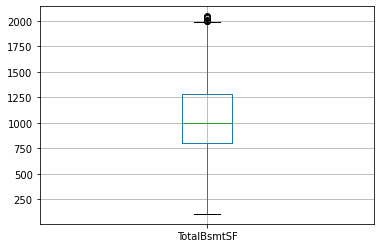

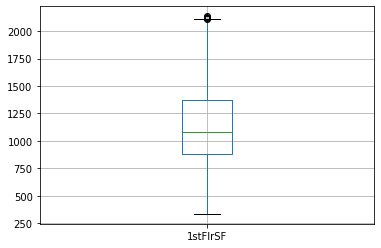

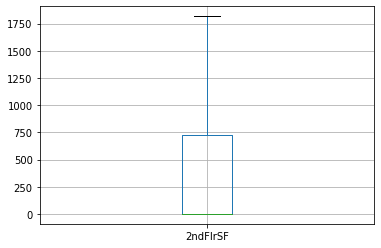

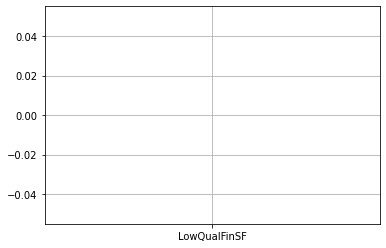

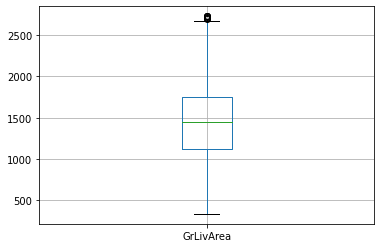

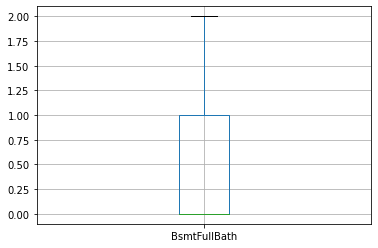

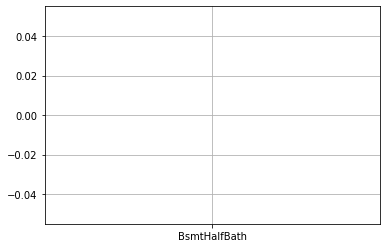

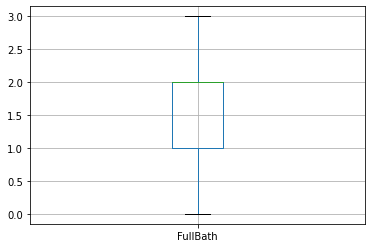

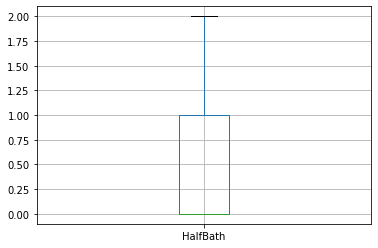

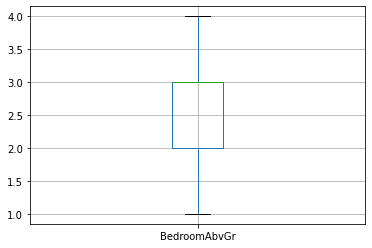

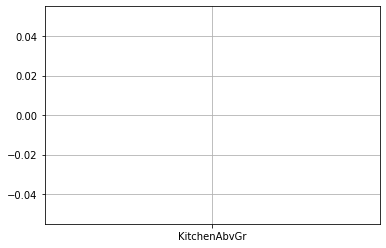

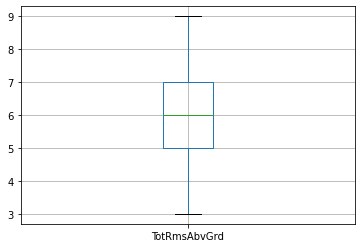

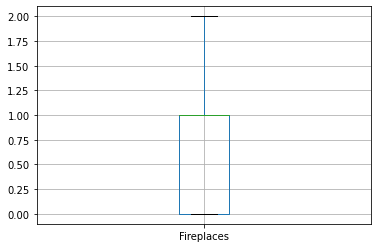

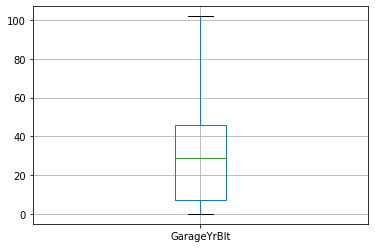

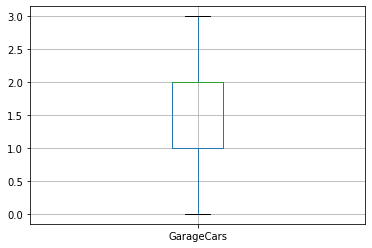

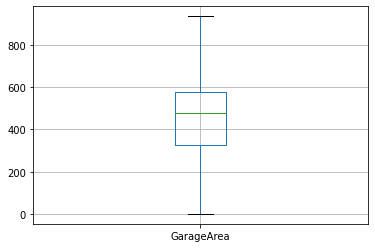

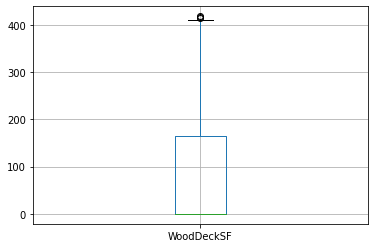

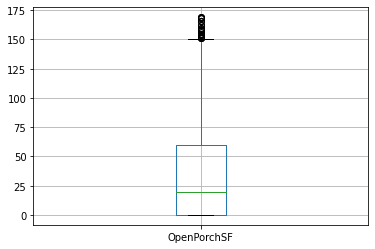

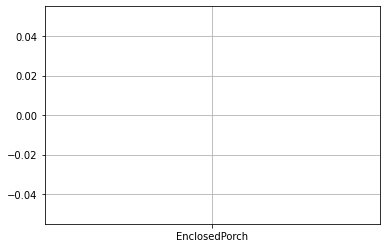

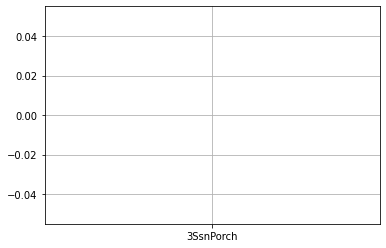

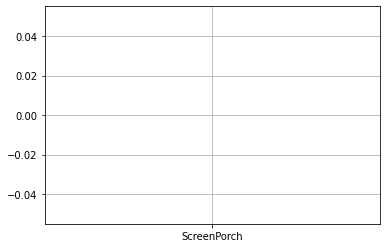

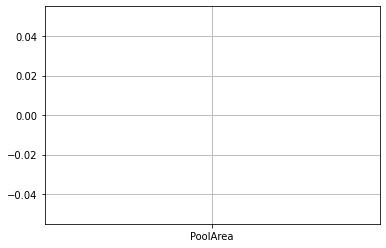

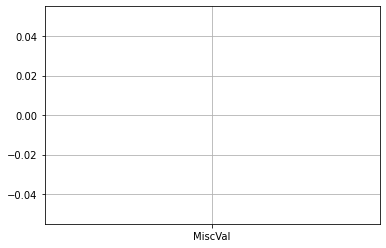

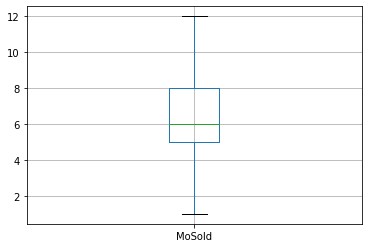

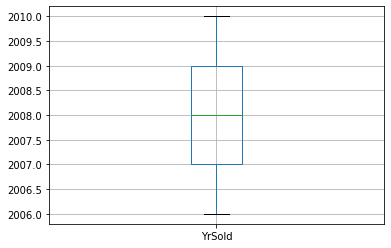

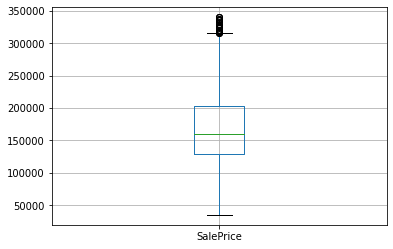

In [43]:
import numpy as np
def iqr(data,col):
    q1,q3 = np.percentile(data[col],[25,75])
    iqr = q3-q1 
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    data = data[(data[col]>lower) & (data[col]<upper)]
    data.boxplot(col)
    
for i in numerical_features:
    iqr(data,i)
    plt.show()

In [44]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Outliers have been removed

In [45]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

<AxesSubplot:>

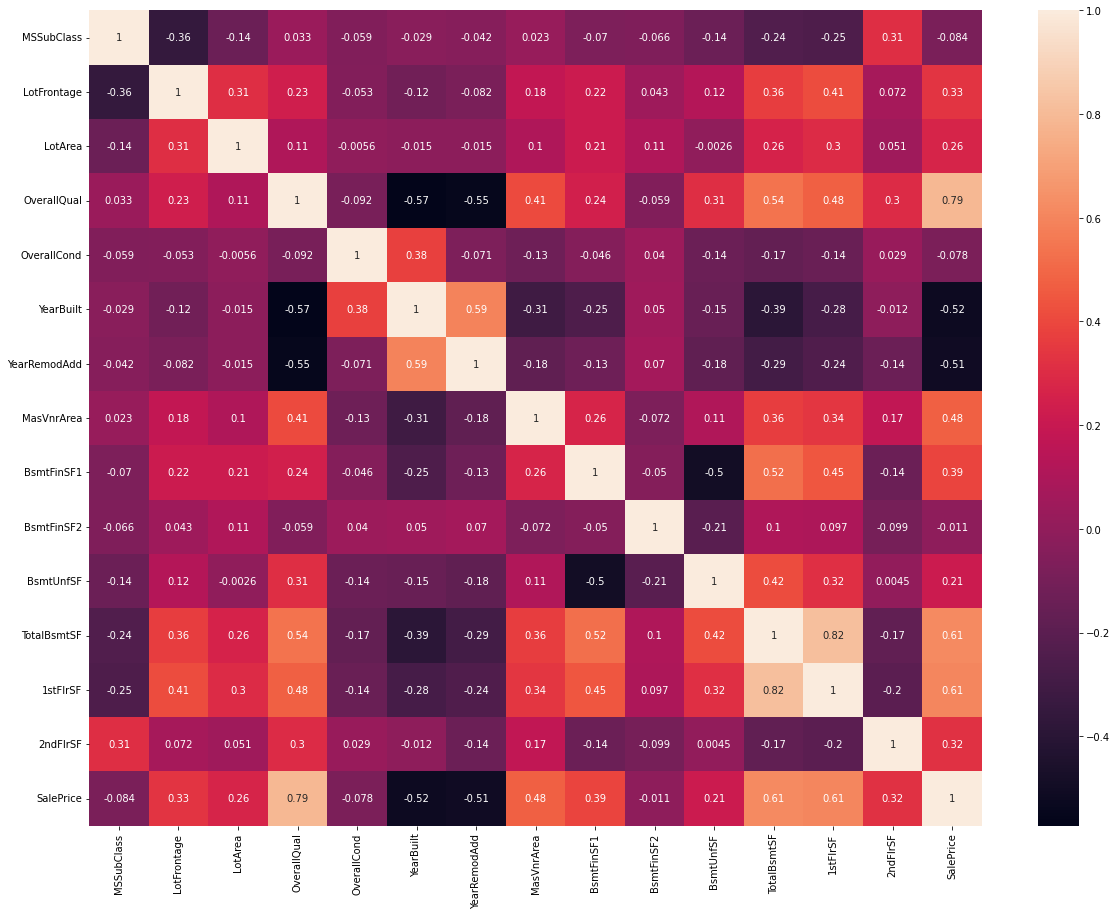

In [46]:
plt.figure(figsize=(20,15))
half1 = data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF','SalePrice']]
sns.heatmap(half1.corr(),annot=True)

In [47]:
data.drop(['MSSubClass','OverallCond','BsmtFinSF2',],axis=1,inplace=True)

<AxesSubplot:>

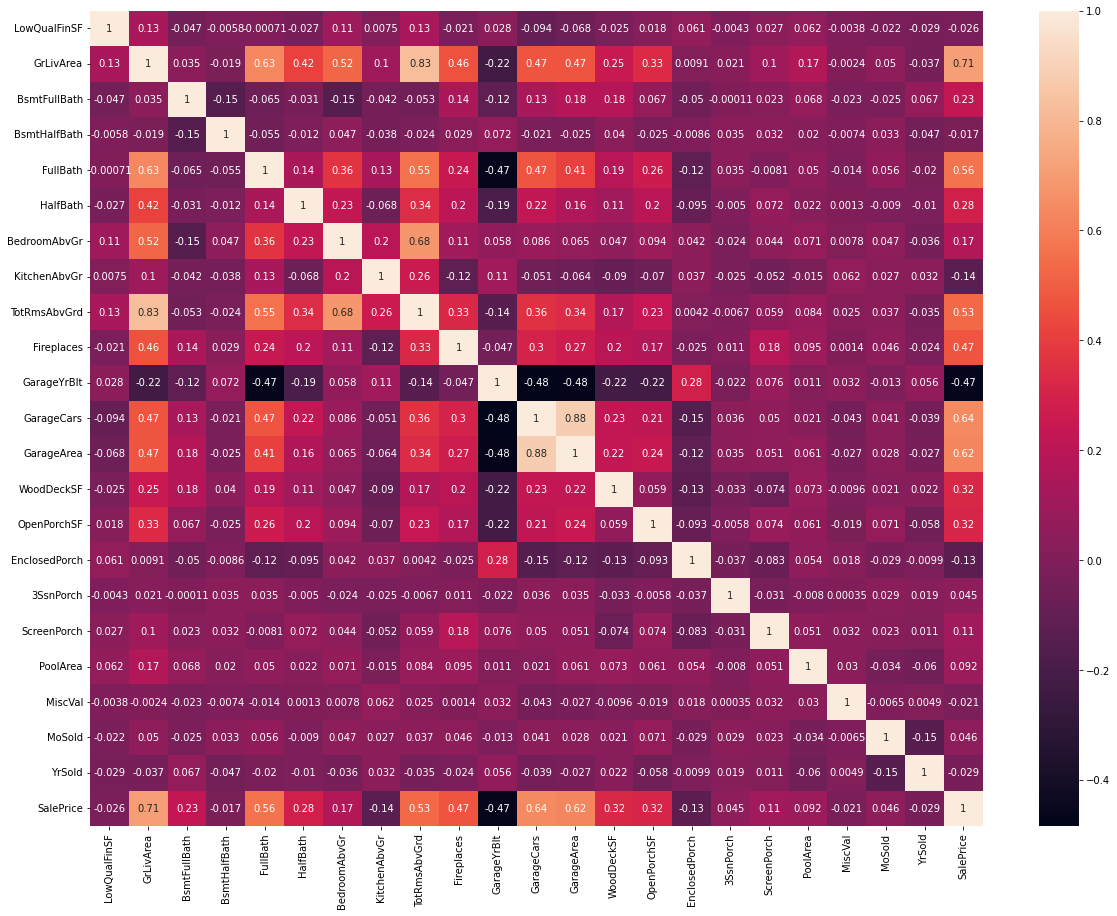

In [48]:
half2 = data[['LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]
plt.figure(figsize=(20,15))
sns.heatmap(half2.corr(),annot=True)

In [49]:
data.drop(['LowQualFinSF','BsmtHalfBath','3SsnPorch','PoolArea','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

In [50]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType',
       'SaleCondition', 'SalePrice']

<AxesSubplot:>

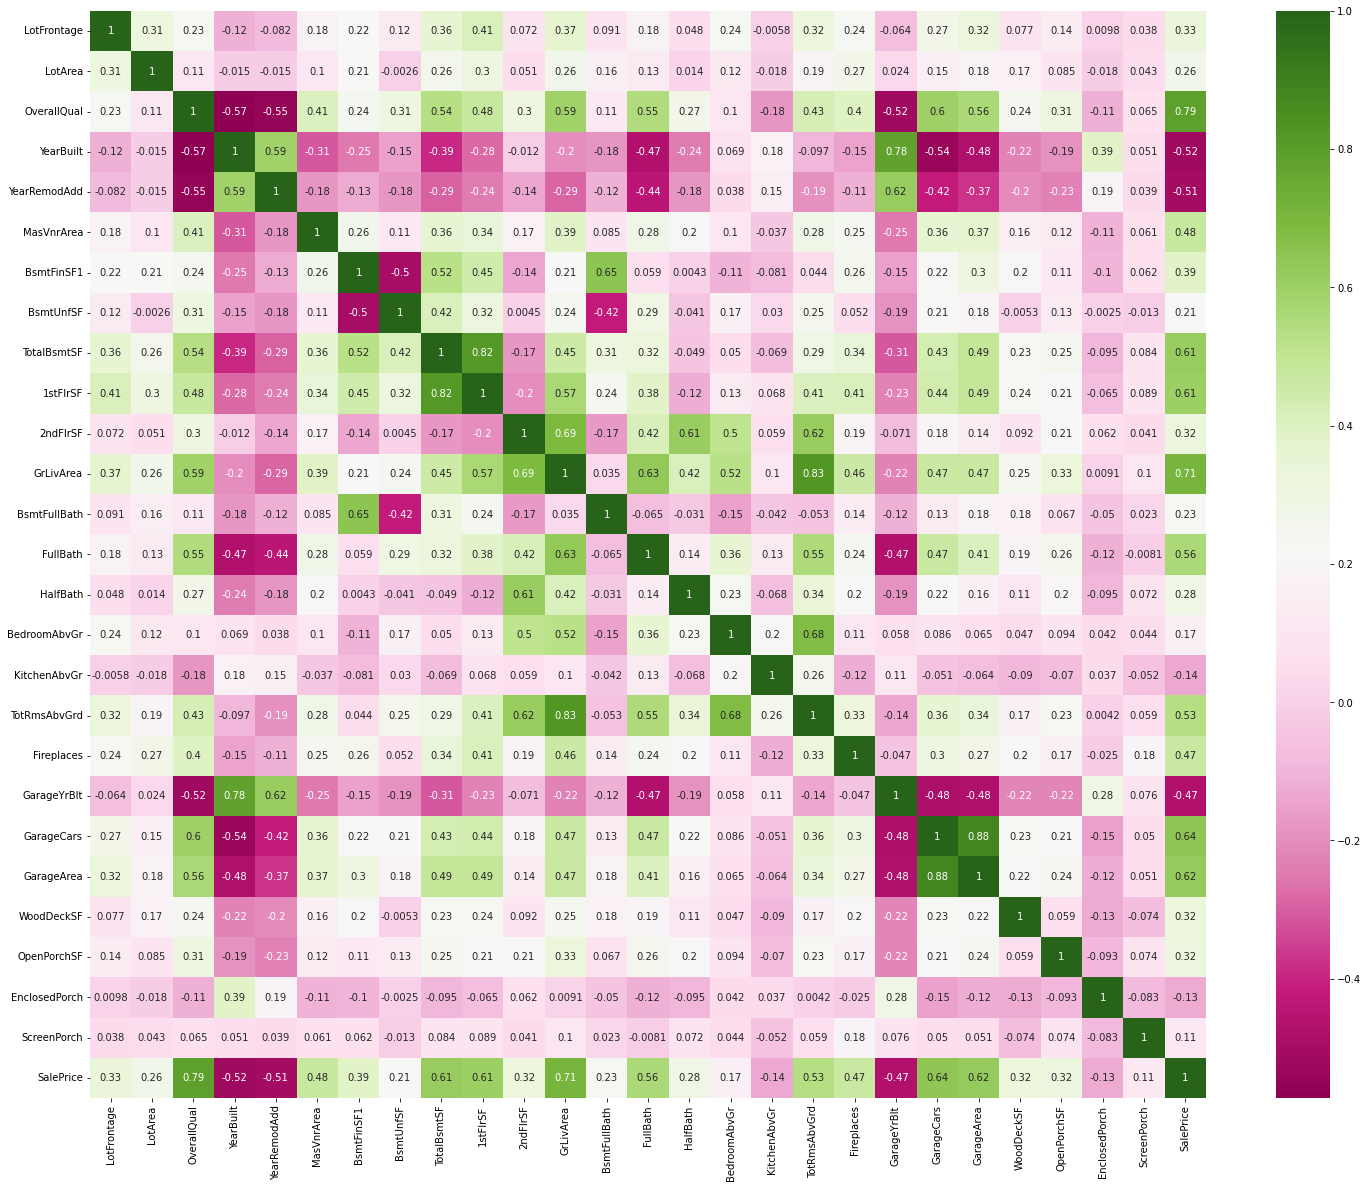

In [51]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap='PiYG')

In [52]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType',
       'SaleCondition', 'SalePrice']

In [53]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [54]:
data.shape

(1460, 65)

In [55]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,WD,Normal,250000


In [56]:
categorical_features = list(data.select_dtypes(include='object').columns)
data[categorical_features].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

> ### Drop categorial features with lots of unique value as it is difficult to encode and manage the data - Do not drop if it has some significant importance in predicting the values eg: neighbourhood

In [57]:
data = data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2','RoofMatl','RoofStyle','Functional',
                  'BsmtQual','LotShape','LandContour','MasVnrType','ExterQual', 
                 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','KitchenQual','GarageQual','GarageCond'],axis=1)

In [58]:
categorical_features = list(data.select_dtypes(include='object').columns)
data[categorical_features].nunique()

MSZoning          5
Street            2
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
BldgType          5
HouseStyle        8
ExterCond         5
Foundation        6
CentralAir        2
Electrical        5
GarageType        6
GarageFinish      3
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [59]:
data.dtypes

MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
ExterCond         object
Foundation        object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64


In [60]:
numerical_features = list(data.select_dtypes(exclude='object').columns)
categorical_features = list(data.select_dtypes(include='object').columns)

In [61]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,5,5,196.0,TA,PConc,706,150,856,Y,SBrkr,856,854,1710,1,2,1,3,1,8,0,Attchd,5.0,RFn,2,548,Y,0,61,0,0,WD,Normal,208500
1,RL,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,1Fam,1Story,6,31,31,0.0,TA,CBlock,978,284,1262,Y,SBrkr,1262,0,1262,0,2,0,3,1,6,1,Attchd,31.0,RFn,2,460,Y,298,0,0,0,WD,Normal,181500
2,RL,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,7,6,162.0,TA,PConc,486,434,920,Y,SBrkr,920,866,1786,1,2,1,3,1,6,1,Attchd,7.0,RFn,2,608,Y,0,42,0,0,WD,Normal,223500
3,RL,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,1Fam,2Story,7,91,36,0.0,TA,BrkTil,216,540,756,Y,SBrkr,961,756,1717,1,1,0,3,1,7,1,Detchd,8.0,Unf,3,642,Y,0,35,272,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,1Fam,2Story,8,8,8,350.0,TA,PConc,655,490,1145,Y,SBrkr,1145,1053,2198,1,2,1,4,1,9,1,Attchd,8.0,RFn,3,836,Y,192,84,0,0,WD,Normal,250000


### Label encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
for i in data.select_dtypes(include='object').columns:
    data[i] = Label_Encoder.fit_transform(data[i].astype(str))

In [63]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,0,4,0,5,0,5,7,5,5,196.0,4,2,706,150,856,1,4,856,854,1710,1,2,1,3,1,8,0,1,5.0,1,2,548,2,0,61,0,0,8,4,208500
1,3,80.0,9600,1,0,2,0,24,0,2,6,31,31,0.0,4,1,978,284,1262,1,4,1262,0,1262,0,2,0,3,1,6,1,1,31.0,1,2,460,2,298,0,0,0,8,4,181500
2,3,68.0,11250,1,0,4,0,5,0,5,7,7,6,162.0,4,2,486,434,920,1,4,920,866,1786,1,2,1,3,1,6,1,1,7.0,1,2,608,2,0,42,0,0,8,4,223500
3,3,60.0,9550,1,0,0,0,6,0,5,7,91,36,0.0,4,0,216,540,756,1,4,961,756,1717,1,1,0,3,1,7,1,5,8.0,2,3,642,2,0,35,272,0,8,0,140000
4,3,84.0,14260,1,0,2,0,15,0,5,8,8,8,350.0,4,2,655,490,1145,1,4,1145,1053,2198,1,2,1,4,1,9,1,1,8.0,1,3,836,2,192,84,0,0,8,4,250000


In [64]:
data.dtypes

MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
ExterCond          int64
Foundation         int64
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
CentralAir         int64
Electrical         int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType         int64
GarageYrBlt      float64
GarageFinish       int64
GarageCars         int64
GarageArea         int64
PavedDrive         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64


### All the features are now numerical

> ## Store the value of features and target output in seperate DataFrames

In [65]:
x = data.drop(['SalePrice'],axis=1).values
y = data['SalePrice'].values

> ## Check if there is multicollinearity

In [66]:
x = pd.DataFrame(x)

In [67]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,3.0,65.0,8450.0,1.0,0.0,4.0,0.0,5.0,0.0,5.0,7.0,5.0,5.0,196.0,4.0,2.0,706.0,150.0,856.0,1.0,4.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,1.0,8.0,0.0,1.0,5.0,1.0,2.0,548.0,2.0,0.0,61.0,0.0,0.0,8.0,4.0
1,3.0,80.0,9600.0,1.0,0.0,2.0,0.0,24.0,0.0,2.0,6.0,31.0,31.0,0.0,4.0,1.0,978.0,284.0,1262.0,1.0,4.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1.0,31.0,1.0,2.0,460.0,2.0,298.0,0.0,0.0,0.0,8.0,4.0
2,3.0,68.0,11250.0,1.0,0.0,4.0,0.0,5.0,0.0,5.0,7.0,7.0,6.0,162.0,4.0,2.0,486.0,434.0,920.0,1.0,4.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,1.0,6.0,1.0,1.0,7.0,1.0,2.0,608.0,2.0,0.0,42.0,0.0,0.0,8.0,4.0
3,3.0,60.0,9550.0,1.0,0.0,0.0,0.0,6.0,0.0,5.0,7.0,91.0,36.0,0.0,4.0,0.0,216.0,540.0,756.0,1.0,4.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,1.0,7.0,1.0,5.0,8.0,2.0,3.0,642.0,2.0,0.0,35.0,272.0,0.0,8.0,0.0
4,3.0,84.0,14260.0,1.0,0.0,2.0,0.0,15.0,0.0,5.0,8.0,8.0,8.0,350.0,4.0,2.0,655.0,490.0,1145.0,1.0,4.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,1.0,9.0,1.0,1.0,8.0,1.0,3.0,836.0,2.0,192.0,84.0,0.0,0.0,8.0,4.0


In [68]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [69]:
x.columns =['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition']
x['INTERCEPT'] = 1

In [70]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['variables'] = x.columns

In [71]:
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,variables,vif
0,MSZoning,1.282294
1,LotFrontage,1.675422
2,LotArea,1.571125
3,Street,1.100348
4,Utilities,1.068813
5,LotConfig,1.074515
6,LandSlope,1.351919
7,Neighborhood,1.187354
8,BldgType,1.642920
9,HouseStyle,1.641371


### Remove columns with high VIF ie., VIF > 3 one by one

In [72]:
x = x.drop(['YearBuilt'],axis=1)

In [73]:
x = x.drop(['1stFlrSF'],axis=1)

In [74]:
x = x.drop(['YearRemodAdd'],axis=1)

In [75]:
x = x.drop(['GrLivArea'],axis=1)

In [76]:
x = x.drop(['GarageCars'],axis=1)

In [77]:
x = x.drop(['TotRmsAbvGrd'],axis=1)

In [78]:
x.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition', 'INTERCEPT'],
      dtype='object')

In [79]:
data = data[['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition','SalePrice']]

In [80]:
data.shape, x.shape

((1460, 38), (1460, 38))

In [81]:
x.drop(['INTERCEPT'],axis=1,inplace=True)

> ## Convert x(DataFrame) back to an array to train it


In [82]:
x = x.values

> ## Split into training and testing set

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100) 

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1022, 37)
(1022,)
(438, 37)
(438,)


> ## Fit the model

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

> ## Predict the values

In [86]:
rf_val_predictions = rf_model.predict(x_test)

In [87]:
rf_val_predictions[:5]

array([119944.59, 209684.  , 186295.93, 210178.08, 152785.5 ])

In [88]:
y_test[:5]

array([120500, 196500, 176000, 213500, 171000])

> ## Find Errors

In [89]:
from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(rf_val_predictions, y_test)
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21,036


### The model has been trained - Now predict values for the test dataset using the trained model

> ## Read and print the data

In [90]:
data_test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


> ## Remove the unwanted columns of test data 

In [91]:
data = data.drop(['SalePrice'],axis=1)

In [92]:
data1 = data.copy()
col = data1.columns
data_test = data_test[col]
data_test.shape

(1459, 37)

In [93]:
data_test.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,RH,80.0,11622,Pave,AllPub,Inside,Gtl,NAmes,1Fam,1Story,5,0.0,TA,CBlock,468.0,270.0,882.0,Y,SBrkr,0,0.0,1,0,2,1,0,Attchd,1961.0,Unf,730.0,Y,140,0,0,120,WD,Normal
1,RL,81.0,14267,Pave,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,108.0,TA,CBlock,923.0,406.0,1329.0,Y,SBrkr,0,0.0,1,1,3,1,0,Attchd,1958.0,Unf,312.0,Y,393,36,0,0,WD,Normal
2,RL,74.0,13830,Pave,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,5,0.0,TA,PConc,791.0,137.0,928.0,Y,SBrkr,701,0.0,2,1,3,1,1,Attchd,1997.0,Fin,482.0,Y,212,34,0,0,WD,Normal
3,RL,78.0,9978,Pave,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,6,20.0,TA,PConc,602.0,324.0,926.0,Y,SBrkr,678,0.0,2,1,3,1,1,Attchd,1998.0,Fin,470.0,Y,360,36,0,0,WD,Normal
4,RL,43.0,5005,Pave,AllPub,Inside,Gtl,StoneBr,TwnhsE,1Story,8,0.0,TA,PConc,263.0,1017.0,1280.0,Y,SBrkr,0,0.0,2,0,2,1,0,Attchd,1992.0,RFn,506.0,Y,0,82,0,144,WD,Normal


> ## Data Preprocessing - Handle Null Values
#### We do not remove outliers in test data as removing outliers leads to removal of that row for which value can't be predicted

In [94]:
data_test.shape

(1459, 37)

In [95]:
null = data_test.columns[data_test.isnull().any()]
null

Index(['MSZoning', 'LotFrontage', 'Utilities', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'SaleType'],
      dtype='object')

In [96]:
data_test[null].dtypes

MSZoning         object
LotFrontage     float64
Utilities        object
MasVnrArea      float64
BsmtFinSF1      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageArea      float64
SaleType         object
dtype: object

In [97]:
numerical_features = list(data_test.select_dtypes(exclude='object').columns)
categorical_features = list(data_test.select_dtypes(include='object').columns)

In [98]:
numerical_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [99]:
numerical_features = ['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [100]:
for i in numerical_features:
        data_test[i] = data_test[i].fillna(data[i].mean())

In [101]:
categorical_features

['MSZoning',
 'Street',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'ExterCond',
 'Foundation',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [102]:
for i in categorical_features:
         data_test[i].fillna(data[i].value_counts().index[0],inplace=True)

In [103]:
data.isna().any()

MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
BldgType         False
HouseStyle       False
OverallQual      False
MasVnrArea       False
ExterCond        False
Foundation       False
BsmtFinSF1       False
BsmtUnfSF        False
TotalBsmtSF      False
CentralAir       False
Electrical       False
2ndFlrSF         False
BsmtFullBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
Fireplaces       False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
ScreenPorch      False
SaleType         False
SaleCondition    False
dtype: bool

### All null values have been handled

### Label Encoding

In [104]:
Label_Encoder = LabelEncoder()
for i in data_test.select_dtypes(include='object').columns:
    data_test[i] = Label_Encoder.fit_transform(data_test[i].astype(str))

In [105]:
data_test

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,3,80.0,11622,1,1,4,0,12,0,2,5,0.0,4,1,468.0,270.0,882.0,1,3,0,0.0,1,0,2,1,0,2,1961.00000,3,730.0,2,140,0,0,120,9,4
1,4,81.0,14267,1,1,0,0,12,0,2,6,108.0,4,1,923.0,406.0,1329.0,1,3,0,0.0,1,1,3,1,0,2,1958.00000,3,312.0,2,393,36,0,0,9,4
2,4,74.0,13830,1,1,4,0,8,0,4,5,0.0,4,2,791.0,137.0,928.0,1,3,701,0.0,2,1,3,1,1,2,1997.00000,1,482.0,2,212,34,0,0,9,4
3,4,78.0,9978,1,1,4,0,8,0,4,6,20.0,4,2,602.0,324.0,926.0,1,3,678,0.0,2,1,3,1,1,2,1998.00000,1,470.0,2,360,36,0,0,9,4
4,4,43.0,5005,1,1,4,0,22,4,2,8,0.0,4,2,263.0,1017.0,1280.0,1,3,0,0.0,2,0,2,1,0,2,1992.00000,2,506.0,2,0,82,0,144,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,21.0,1936,1,1,4,0,10,3,4,4,0.0,4,1,0.0,546.0,546.0,1,3,546,0.0,1,1,3,1,0,0,29.30959,0,0.0,2,0,0,0,0,9,4
1455,5,21.0,1894,1,1,4,0,10,4,4,4,0.0,4,1,252.0,294.0,546.0,1,3,546,0.0,1,1,3,1,0,5,1970.00000,3,286.0,2,0,24,0,0,9,0
1456,4,160.0,20000,1,1,4,0,11,0,2,5,0.0,4,1,1224.0,0.0,1224.0,1,3,0,1.0,1,0,4,1,1,6,1960.00000,3,576.0,2,474,0,0,0,9,0
1457,4,62.0,10441,1,1,4,0,11,0,5,5,0.0,4,2,337.0,575.0,912.0,1,3,0,0.0,1,0,3,1,0,0,29.30959,0,0.0,2,80,32,0,0,9,4


In [106]:
data_test.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
MasVnrArea       0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
Electrical       0
2ndFlrSF         0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
SaleType         0
SaleCondition    0
dtype: int64

> ## Predict

In [107]:
data_test = data_test.to_numpy()
data_test

array([[3.0000e+00, 8.0000e+01, 1.1622e+04, ..., 1.2000e+02, 9.0000e+00,
        4.0000e+00],
       [4.0000e+00, 8.1000e+01, 1.4267e+04, ..., 0.0000e+00, 9.0000e+00,
        4.0000e+00],
       [4.0000e+00, 7.4000e+01, 1.3830e+04, ..., 0.0000e+00, 9.0000e+00,
        4.0000e+00],
       ...,
       [4.0000e+00, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 9.0000e+00,
        0.0000e+00],
       [4.0000e+00, 6.2000e+01, 1.0441e+04, ..., 0.0000e+00, 9.0000e+00,
        4.0000e+00],
       [4.0000e+00, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 9.0000e+00,
        4.0000e+00]])

In [108]:
sale_price_pred = rf_model.predict(data_test)

In [109]:
out = pd.DataFrame(sale_price_pred)

In [110]:
out.columns = ['SalePrice']

In [111]:
out.head()

,SalePrice
0,130172.50
1,165292.00
2,174972.50
3,164508.14
4,191339.56


In [112]:
data_test.shape,out.shape

((1459, 37), (1459, 1))

In [113]:
test1 = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [114]:
df2 = test1[['Id']]
print(df2)

        Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


In [115]:
df2 = pd.DataFrame(df2)

In [116]:
result = pd.concat([df2, out], axis=1, join='inner')
display(result)

,Id,SalePrice
0,1461,130172.50
1,1462,165292.00
2,1463,174972.50
3,1464,164508.14
4,1465,191339.56
...,...,...
1454,2915,109385.00
1455,2916,88979.11
1456,2917,178926.85
1457,2918,122782.00


In [117]:
result = pd.DataFrame(result)

In [118]:
result.head()

,Id,SalePrice
0,1461,130172.50
1,1462,165292.00
2,1463,174972.50
3,1464,164508.14
4,1465,191339.56


In [119]:
result.to_csv('submission.csv',index=False)